<a href="https://colab.research.google.com/github/blue-create/langlens/blob/main/scripts/describe_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Paths

In [2]:
# imports
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm 
from datetime import datetime


In [ ]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# set paths
data_path="drive/MyDrive/Work/Frontline/data/"
unzipped_path = data_path+"unzipped"
json_path = data_path+"json/"


### Data  and Plots

In [5]:
dates=[]
ressorts=[]
journals=[]

In [7]:
for json in tqdm(os.listdir(json_path)):
  df_temp=pd.read_json(json_path+"/"+json)
  for row_j in range(len(df_temp)):
    for art_i in range(len(df_temp.loc[row_j,:][0])):
      dates.append(df_temp.loc[row_j,:][0][art_i]["datum"])
      ressorts.append(df_temp.loc[row_j,:][0][art_i]["ressort"])
      journals.append(df_temp.loc[row_j,:][0][art_i]["name"])


100%|██████████| 5/5 [10:27<00:00, 125.52s/it]


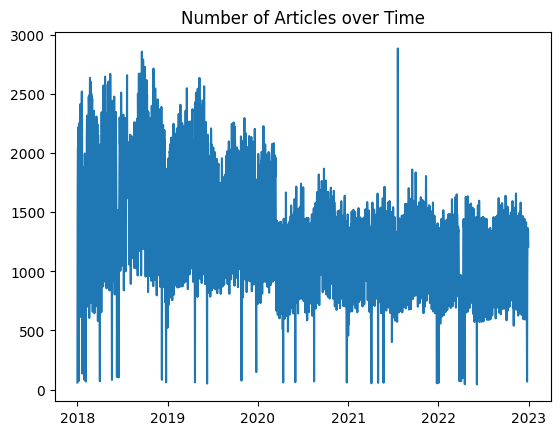

In [8]:
lists = sorted(dict(Counter(dates)).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot([pd.to_datetime(i) for i in x], y)
plt.title("Number of Articles over Time")
plt.show("bar")

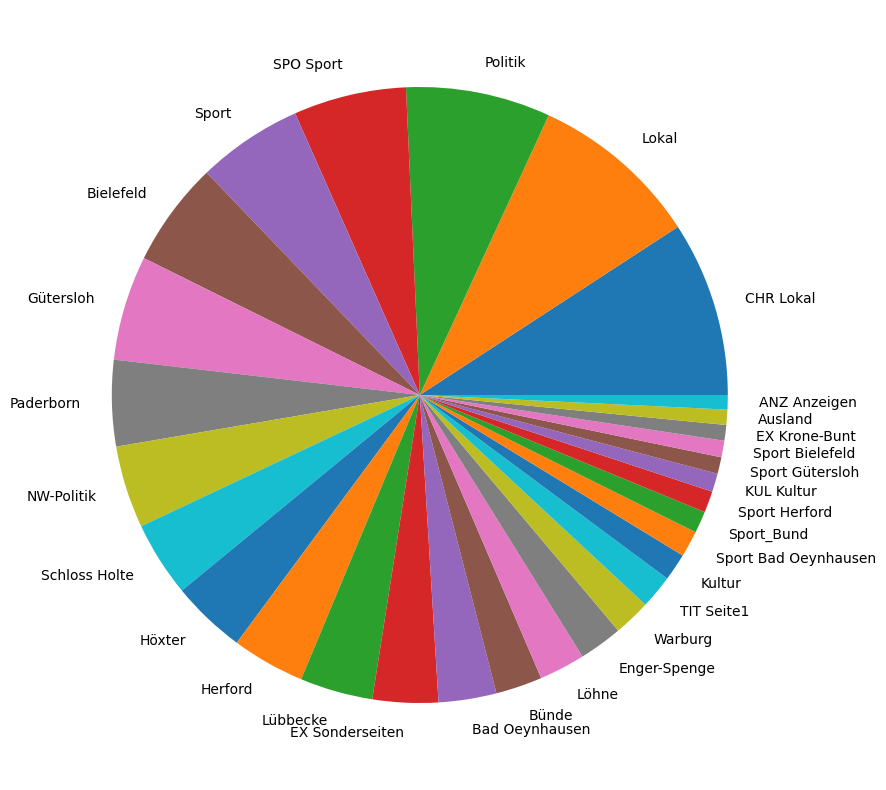

In [15]:
lists = (dict(Counter(ressorts).most_common()).items()) 

x, y = zip(*lists) 
fig, ax = plt.subplots(figsize=(10,10));
ax.pie(y[:30], labels=x[:30]);